# Visualizations for Inference Statistics

## Why is data visualization important?

* Humans process visually -  information, using charts or graphs to analyze large amounts of complex data is easier than poring over spreadsheets or reports

* Tell Stories and make and Impact - Data visualization is a more effective way way to convey concepts in a universal manner 

* Discover Insights 

* More Effectively analyze data relationships

## We will focus on Visualizations for Inference Statistics

  * Distributions
  * Scatter Plots
  * Line Graphs
  * Box Plots - Anomoly Detection
  * Bar Graphs
  * Category Plots
  * Heatmaps


# Load and Transform/Prepare the Data

References and Data

https://www.kaggle.com/camnugent/california-housing-prices

https://www.kaggle.com/neuromusic/avocado-prices

https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# before you begin provide your credentials to the runtime
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

from google.cloud import bigquery
project_id = 'alg-analytics-247823'
client = bigquery.Client(project=project_id)

Authenticated


In [4]:
# https://towardsdatascience.com/getting-started-with-google-colab-f2fff97f594c
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [5]:
# import the data
# look at the columns with df.head()

dfa = pd.read_csv('/gdrive/My Drive/Google Bothell Workshop/avocado.csv')
display(dfa.head())

dfa['Date'] = pd.to_datetime(dfa.Date)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
# import the data
# look at the columns with df.head()

df = pd.read_csv('/gdrive/My Drive/Google Bothell Workshop/CA_housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [0]:
df["rooms_per_household"] = df["total_rooms"]/ df["households"] 
df["bedrooms_per_room"] = df["total_bedrooms"]/ df["total_rooms"] 
df["population_per_household"] = df["population"]/ df["households"]

In [0]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [0]:
# get the counts for categories in "ocean proximitycolumn
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Line Graphs

Avocado Dataset

https://www.absentdata.com/python-graphs/seaborn-line-chart/

Price over time

It's typical to plot some value over time, e.g., price over time for avocado prices

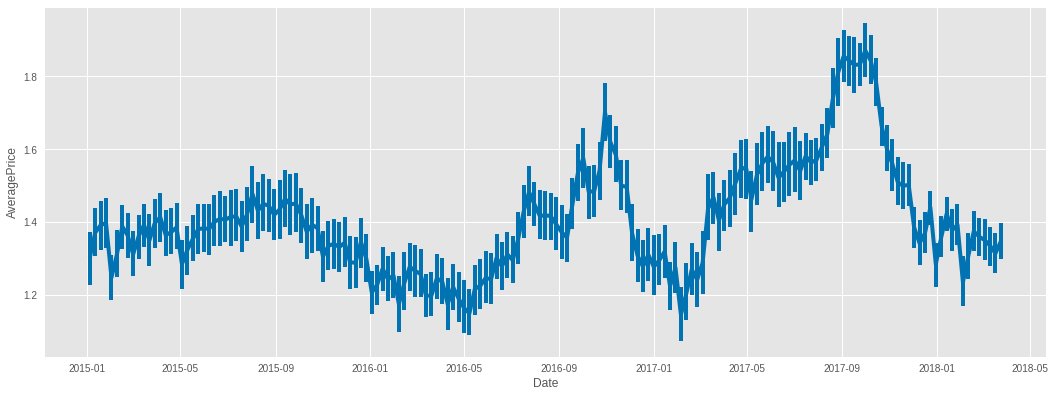

In [0]:

# This will create a line plot of price over time
fig, ax = plt.subplots(figsize=(16,6))  
sns.lineplot(data=dfa, x='Date',y='AveragePrice', ax=ax, err_style="bars" )

add multiple line plots by using the hue parameter

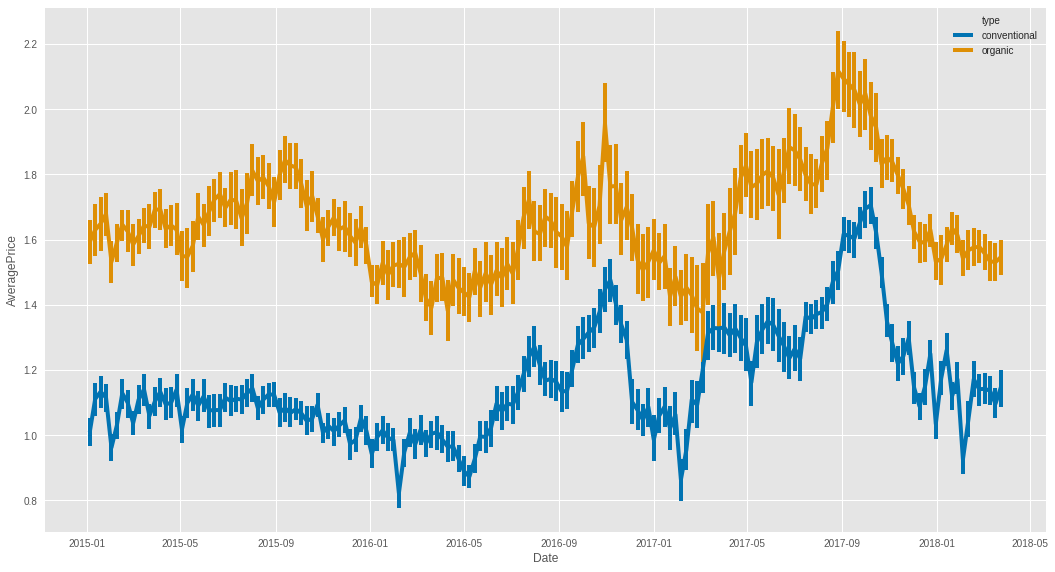

In [0]:

plt.figure(figsize=(16,9))
sns.lineplot(data = dfa, x='Date',y='AveragePrice',err_style='bars', hue='type')

# Histograms

A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc. An example of a histogram, and the raw data it was constructed from, is shown below:

* SNS Dist Plot
* Pandas Histogram Matrix

In [0]:
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


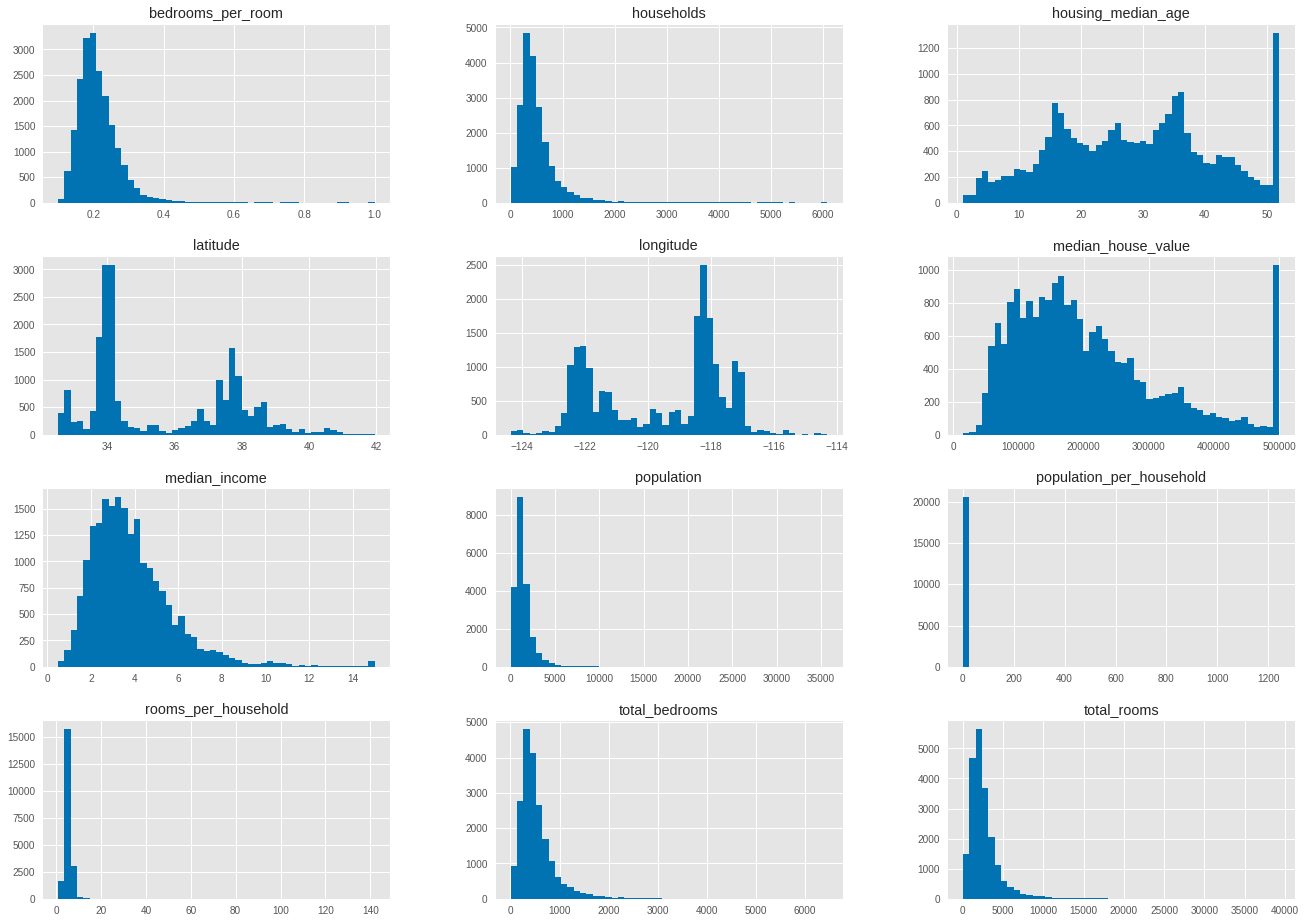

In [0]:
# Pandas Plotting Functions
df.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Distribution of the pickup ditribution after the treatment of outliers')

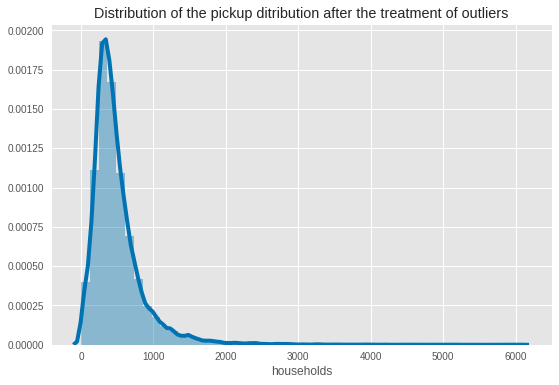

In [0]:
sns.set_palette("colorblind", 8)
sns.distplot(df['households'],kde=True)
plt.title('Houselds')

Text(0.5, 1.0, 'Median Income')

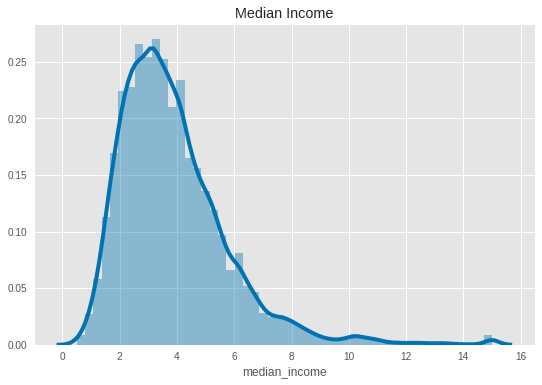

In [0]:
sns.set_palette("colorblind", 8)
sns.distplot(df['median_income'],kde=True)
plt.title('Median Income')

data2.hist(bins=50, figsize=(20,15))

# Scatterplots

What are scatterplots
* Scatter Plots show the relationship between to numeric variables
* Typically used to fnd correlation between variables

Example

* In this case we see that meian_hous_value hits a maximum, mostly due to some maximum bin in the data collection.

* There is a strong correlation between median income and median house value

Pandas and SNS
* Distplot
* Pandas Scater Matrix
* SNS Pairplot

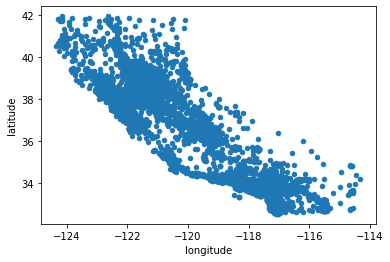

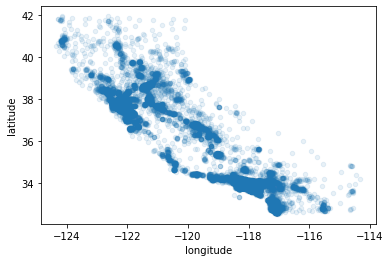

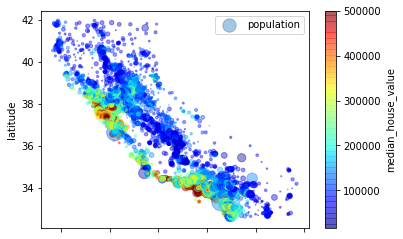

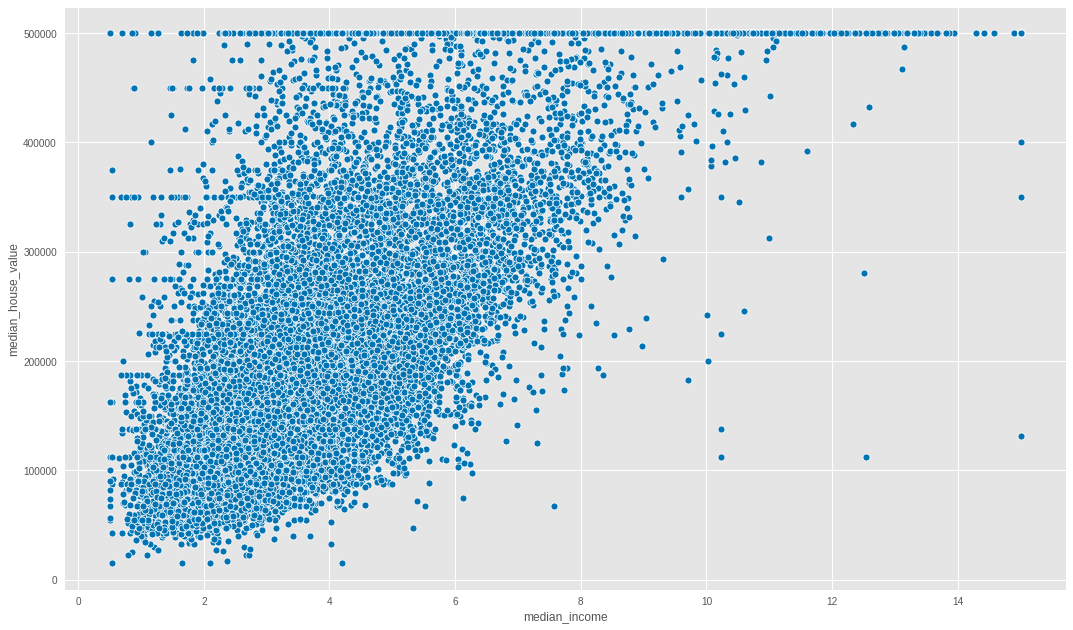

In [0]:
#figure,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

fig, ax = plt.subplots(figsize=(16,10)) 
pltsytle='fivethirtyeight'
pltstyle='ggplot'
plt.style.use(pltstyle)
sns.scatterplot(x='median_income',y='median_house_value',data=df, ax=ax)


* With the scatter matrix you can get a quick look at multiple variables and their correlations or lack thre of.
* Median house value and housing median age do not show a correlation

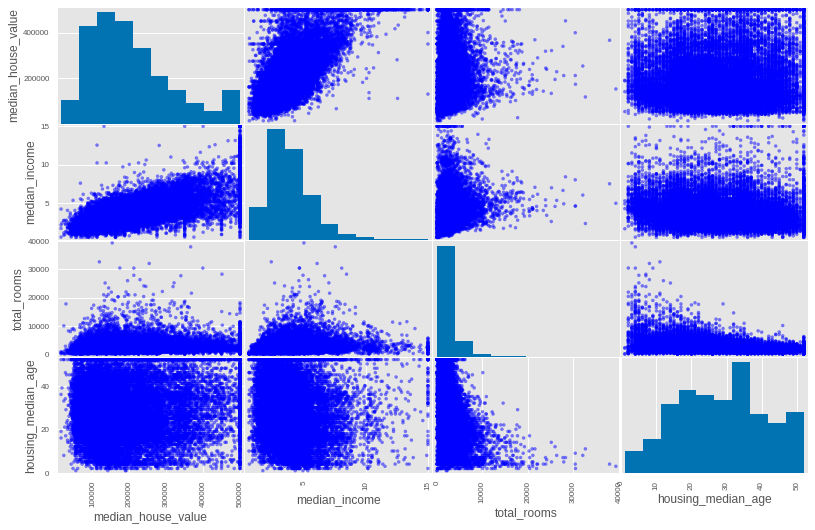

In [0]:
#scatter matrix 
from pandas.plotting import scatter_matrix
# The most promising attribute to predict the median house value is the median income,
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12,8), color='blue');

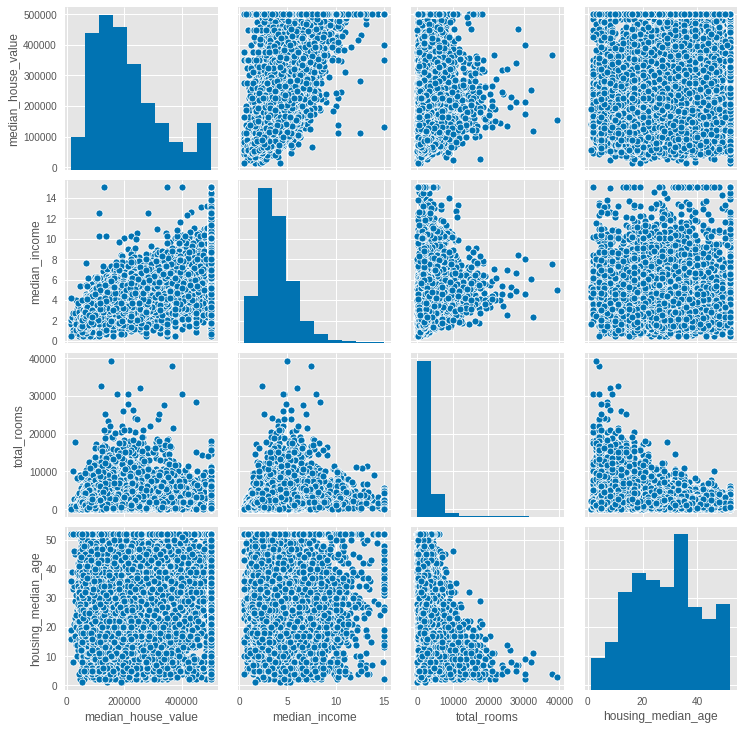

In [0]:
sns.set_palette("colorblind", 8)
cols=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 
      'households', 'median_income', 'median_house_value']
sns.pairplot(df, vars=attributes)

When observing the interesting multi-modal distributions of Lat and Long, it seems like an obvious next step to plot a scatter plot of Lat vs. Long. This will yield a rather nice map like image of population clusters. When we turn colors on it presents a very nice geo like heatmap.

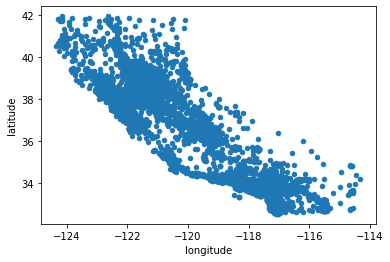

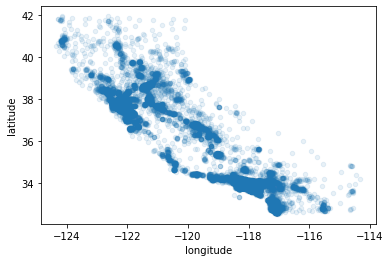

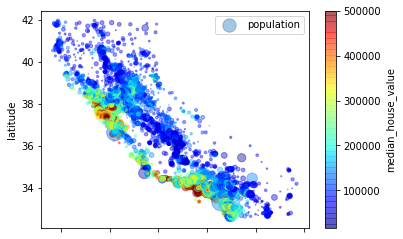

In [9]:
df.plot(kind ="scatter", x ="longitude", y ="latitude")

# Setting the alpha option to 0.1 makes it much easier to visualize the places 
# where there is a high density of data points


df.plot(kind ="scatter", x ="longitude", y ="latitude", alpha = 0.1)

df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=df["population"]/100, 
             label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )

# BoxPlot, Category Plots, Violin Plot, Strip Plot

* Visualize distribution by category

https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51 

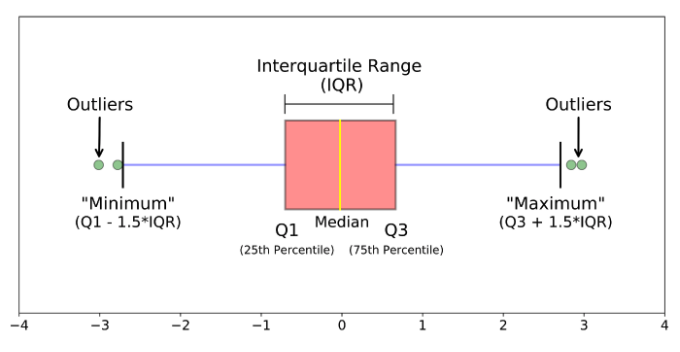

In [0]:
from IPython.display import Image
Image('/gdrive/My Drive/Google Bothell Workshop/BoxPlot.png')

Text(0.5, 1.0, 'Median Income (x $10,000)')

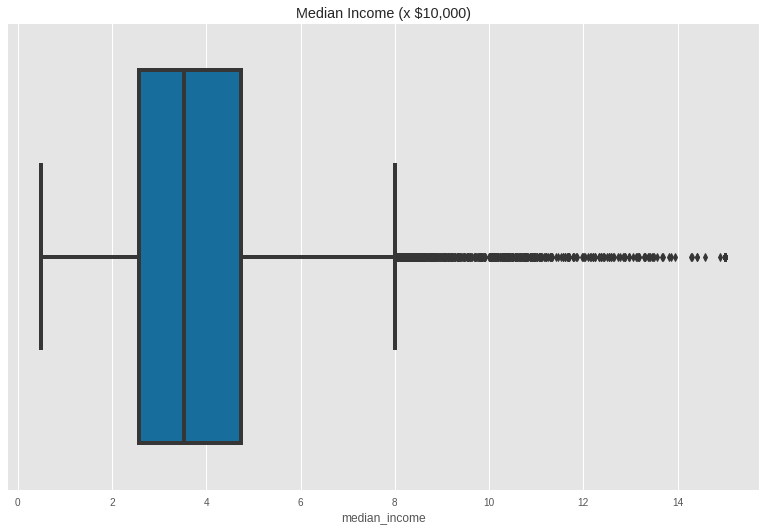

In [0]:

#sns.catplot( x= 'vendor_id', y="median_income",kind="strip",data=df)
fig, ax = plt.subplots(figsize=(12,8))  
sns.boxplot( y="median_income",data=df, orient='horizontal', ax=ax)
plt.title('Median Income (x $10,000)')

In [0]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

Text(0.5, 1.0, 'Median House Value by Ocean Proximity')

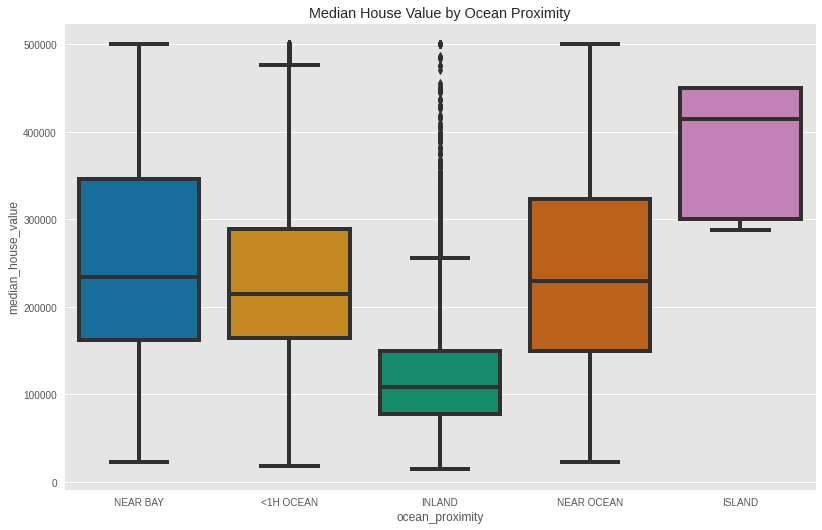

In [0]:
cols=['median_income','rooms_per_household','population_per_household']
fig, ax = plt.subplots(figsize=(12,8))  
sns.boxplot( x=df['ocean_proximity'],y="median_house_value",data=df, ax=ax)
plt.title('Median House Value by Ocean Proximity')


Catplots

illustrate distribution by category with some random jitter on the x axis

Text(0.5, 1.0, 'Category Plot: Median House Value by Ocean Proximity')

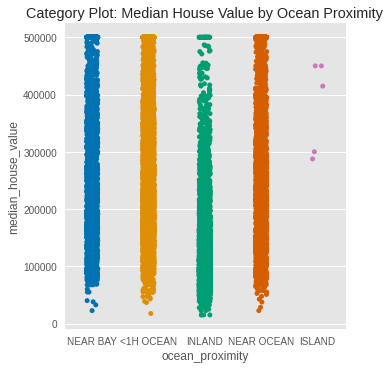

In [0]:

ax=sns.catplot(x='ocean_proximity', y="median_house_value", data=df)
plt.title('Category Plot: Median House Value by Ocean Proximity')

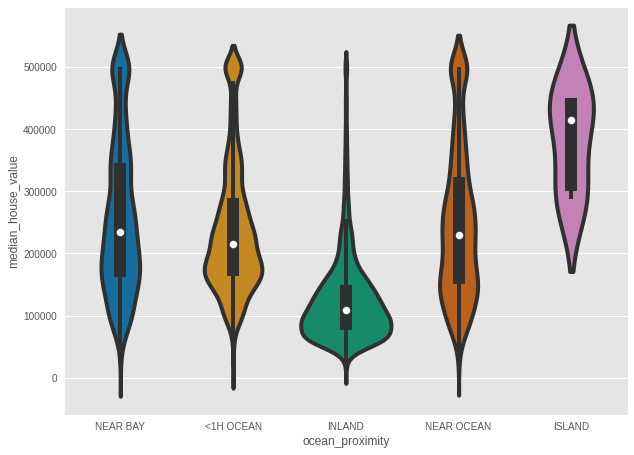

In [0]:

fig, ax = plt.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax, x=df['ocean_proximity'],  y = df['median_house_value'] ) 

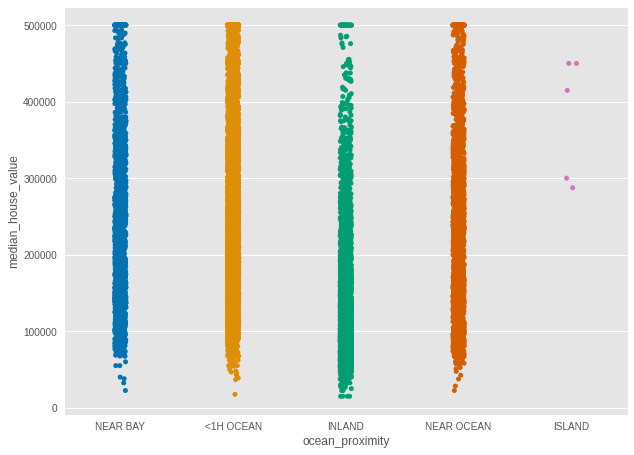

In [0]:
fig, ax = plt.subplots(figsize =(9, 7)) 
ax = sns.stripplot(x="ocean_proximity", y="median_house_value", data=df, jitter=0.05)

# Bar Plot

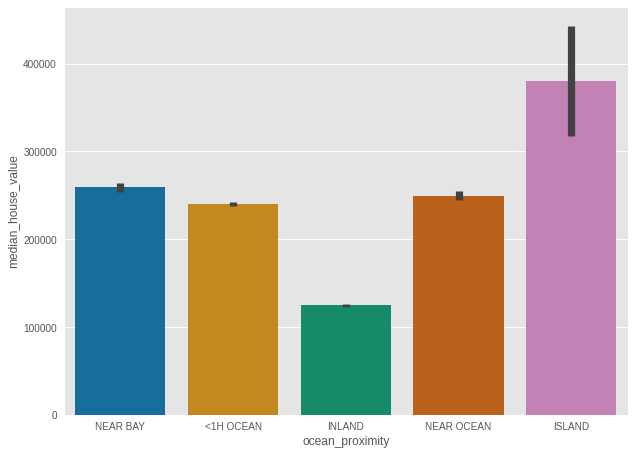

In [0]:
fig, ax = plt.subplots(figsize =(9, 7)) 
ax = sns.barplot(x="ocean_proximity", y="median_house_value", data=df)

# Heatmaps

You may want to do one-hot encoding so as to include categorical variables in the heat map

In [0]:
df2=df.copy()
df2=pd.get_dummies(df2,columns=['ocean_proximity'])
df2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
rooms_per_household           0.151948
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population_per_household     -0.023737
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
bedrooms_per_room            -0.255880
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


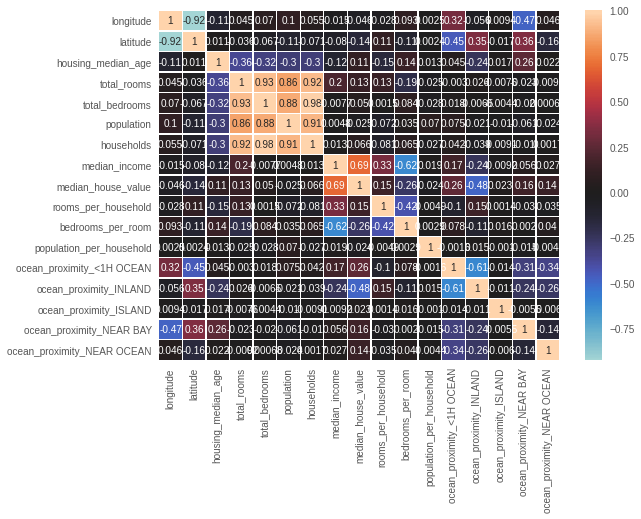

In [0]:
cols=df2.columns
corr_matrix = df2[cols].corr()  
plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, center=0, annot=True, linewidths=.3)
print(corr_matrix["median_house_value"].sort_values( ascending = False))